**Import ML Libraries**

In [367]:
#Import ML Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

**Read DataSet File**

In [368]:
#Read DataSet File
dataSet = pd.read_csv('HousePriceDataset.csv')

**Display Preview of the data**

In [369]:
#Display Preview of the data
dataSet.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


**Checking DataSet data types**

In [370]:
#Checking DataSet data types
dataSet.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

**Check whole info in summary included no of records**

In [371]:
#Check whole info in summary included no of records
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

**Check null data records by total from each column**

In [372]:
#Check null data records by total from each column
dataSet.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

*So that theres no null data records in this dataset*

**Check the Math measures by describe dataset by round the value upto 2 decimal points**

In [373]:
#Check the Math measures by describe dataset by round the value upto 2 decimal points
np.round(dataSet.describe(), 2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00
mean,551962.99,3.40,2.16,2139.35,14852.52,1.51,0.01,0.24,3.45,1827.27,312.08,1970.79,808.61
std,563834.70,0.91,0.78,963.21,35884.44,0.54,0.08,0.78,0.68,862.17,464.14,29.73,979.41
min,0.00,0.00,0.00,370.00,638.00,1.00,0.00,0.00,1.00,370.00,0.00,1900.00,0.00
25%,322875.00,3.00,1.75,1460.00,5000.75,1.00,0.00,0.00,3.00,1190.00,0.00,1951.00,0.00
50%,460943.46,3.00,2.25,1980.00,7683.00,1.50,0.00,0.00,3.00,1590.00,0.00,1976.00,0.00
75%,654962.50,4.00,2.50,2620.00,11001.25,2.00,0.00,0.00,4.00,2300.00,610.00,1997.00,1999.00
max,26590000.00,9.00,8.00,13540.00,1074218.00,3.50,1.00,4.00,5.00,9410.00,4820.00,2014.00,2014.00


**Sactter Plot visualization by price against to living area**

Text(0.5, 1.0, 'House Price by Living Area')

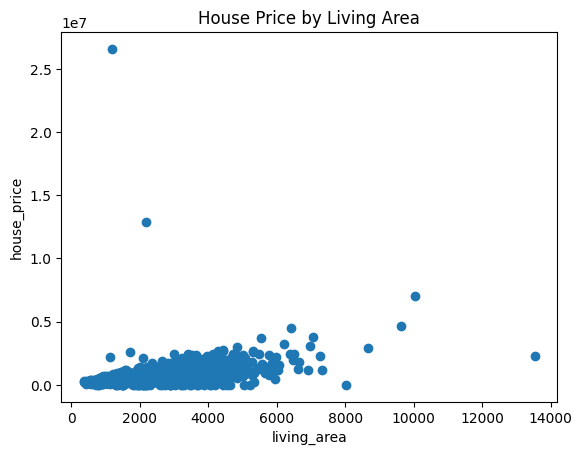

In [374]:
#Sactter Plot visualization by price against to living area
plt.scatter(dataSet.sqft_living,dataSet.price)
plt.xlabel('living_area')
plt.ylabel('house_price')
plt.title('House Price by Living Area')

**Data preprocessing by checing unique values to make raw data ready for ML model by Date**

In [375]:
#Data preprocessing by checing unique values to make raw data ready for ML model by Date
dataSet['date'].unique()

array(['2014-05-02 00:00:00', '2014-05-03 00:00:00',
       '2014-05-04 00:00:00', '2014-05-05 00:00:00',
       '2014-05-06 00:00:00', '2014-05-07 00:00:00',
       '2014-05-08 00:00:00', '2014-05-09 00:00:00',
       '2014-05-10 00:00:00', '2014-05-11 00:00:00',
       '2014-05-12 00:00:00', '2014-05-13 00:00:00',
       '2014-05-14 00:00:00', '2014-05-15 00:00:00',
       '2014-05-16 00:00:00', '2014-05-17 00:00:00',
       '2014-05-18 00:00:00', '2014-05-19 00:00:00',
       '2014-05-20 00:00:00', '2014-05-21 00:00:00',
       '2014-05-22 00:00:00', '2014-05-23 00:00:00',
       '2014-05-24 00:00:00', '2014-05-25 00:00:00',
       '2014-05-26 00:00:00', '2014-05-27 00:00:00',
       '2014-05-28 00:00:00', '2014-05-29 00:00:00',
       '2014-05-30 00:00:00', '2014-05-31 00:00:00',
       '2014-06-01 00:00:00', '2014-06-02 00:00:00',
       '2014-06-03 00:00:00', '2014-06-04 00:00:00',
       '2014-06-05 00:00:00', '2014-06-06 00:00:00',
       '2014-06-07 00:00:00', '2014-06-08 00:0

**BoxPlot data after preprocessing of data**

<Axes: xlabel='price'>

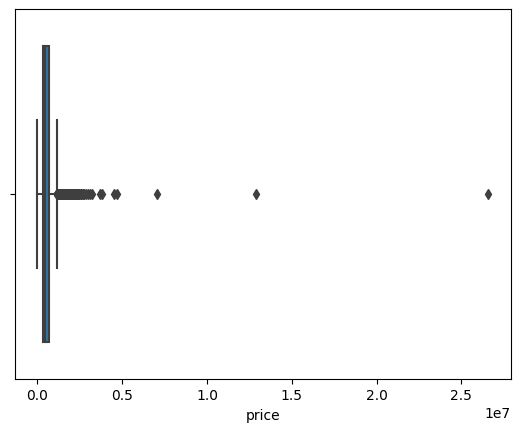

In [376]:
#BoxPlot data after preprocessing of data
sns.boxplot(x=dataSet['price'], data=dataSet)

*We can see theres more outliers in this BoxPlot* 

**Histogram View of DataSet**

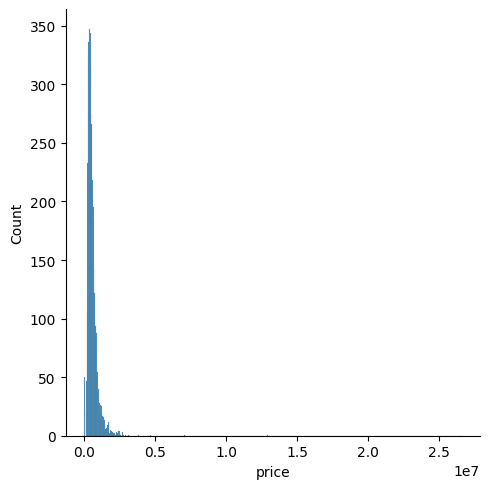

In [377]:
#Histogram View of DataSet
sns.displot(x=dataSet['price'])

*Need to remove outliers of price data before train model*

**Removing outliers by using function**

In [378]:
#Removing outliers by using function
def remove_outliers(dataSet, x):
    Q25 = np.percentile(dataSet[x], 25)
    Q75 = np.percentile(dataSet[x], 75)
    IQR = Q75 - Q25
    cut_off = IQR * 1.5
    lower_limit, upper_limit = 1, (Q75 + cut_off)
    dataSet = dataSet[(dataSet[x] < upper_limit) & (dataSet[x] > lower_limit)]
    print(f"Function called and Outliers of {x} are removed success !!!\n")
    return dataSet

In [379]:
dataSet = remove_outliers(dataSet, 'price')

Function called and Outliers of price are removed success !!!



**After removing outliers of price check the remain data**

In [380]:
#After removing outliers of price check the remain data
dataSet.shape

(4311, 18)

*From 4600 reduced to 4311 rows*

**Data Describe after removing outliers and transpose index and columns**

In [381]:
#Data Describe after removing outliers and transpose index and columns
dataSet.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4311.0,487456.901904,215659.641022,7800.0,320000.00,450000.00,615000.0,1150000.00
bedrooms,4311.0,3.351659,0.881215,0.0,3.00,3.00,4.0,9.00
bathrooms,4311.0,2.094352,0.715171,0.0,1.75,2.25,2.5,5.75
sqft_living,4311.0,2030.697982,810.138266,370.0,1430.00,1920.00,2510.0,7320.00
sqft_lot,4311.0,14598.596149,36141.110719,638.0,5000.00,7566.00,10696.5,1074218.00
floors,4311.0,1.495129,0.536898,1.0,1.00,1.50,2.0,3.50
waterfront,4311.0,0.003711,0.060815,0.0,0.00,0.00,0.0,1.00
view,4311.0,0.173742,0.644964,0.0,0.00,0.00,0.0,4.00
condition,4311.0,3.443749,0.669194,1.0,3.00,3.00,4.0,5.00
sqft_above,4311.0,1747.008583,763.543329,370.0,1170.00,1540.00,2190.0,7320.00


**Histogram Visualization after the preprocess**

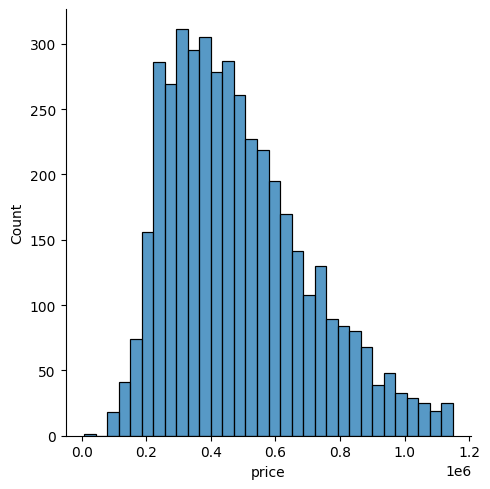

In [382]:
#Histogram Visualization after the preprocess
sns.displot(x=dataSet['price'])

*Price will be vary in several year so need to get the date time data properly before train the model*

**Convertion of Date data**

In [383]:
#Convertion of Date data
dataSet['date'] = pd.to_datetime(dataSet['date'])
dataSet['date'].dtype

dtype('<M8[ns]')

**Extraction of year & month** 

In [384]:
#Extraction of year & month
dataSet['year'] = dataSet['date'].dt.year
dataSet['month'] = dataSet['date'].dt.month

**Data Preview after changes**

In [385]:
#Data Preview after changes
dataSet.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year,month
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,5
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014,5
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014,5
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014,5
5,2014-05-02,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA,2014,5


*Seems like all year data in same year and need to remove them before train*

**Removing unwanted columns from dataset for ML model** 

In [386]:
#Removing unwanted columns from dataset for ML model
dataSet.drop(['year', 'date', 'statezip' , 'country' , 'street' ], axis=1, inplace=True)

**Data set from country USA and lets check how many houses by its cities**

In [387]:
#Data set from country USA and lets check how many houses by its cities
dataSet['city'].value_counts()

city
Seattle                1461
Renton                  291
Bellevue                232
Redmond                 227
Kent                    183
Issaquah                183
Kirkland                176
Auburn                  175
Sammamish               166
Federal Way             145
Shoreline               121
Woodinville             111
Maple Valley             95
Burien                   72
Snoqualmie               69
Kenmore                  65
Des Moines               58
Mercer Island            50
North Bend               50
Duvall                   42
Covington                41
Lake Forest Park         34
Bothell                  33
Newcastle                31
Vashon                   29
SeaTac                   28
Tukwila                  28
Enumclaw                 27
Carnation                21
Normandy Park            16
Fall City                 9
Black Diamond             8
Ravensdale                7
Pacific                   6
Algona                    5
Clyde Hill     

**BarPlot view of top 10 cities**

<Axes: xlabel='count', ylabel='city'>

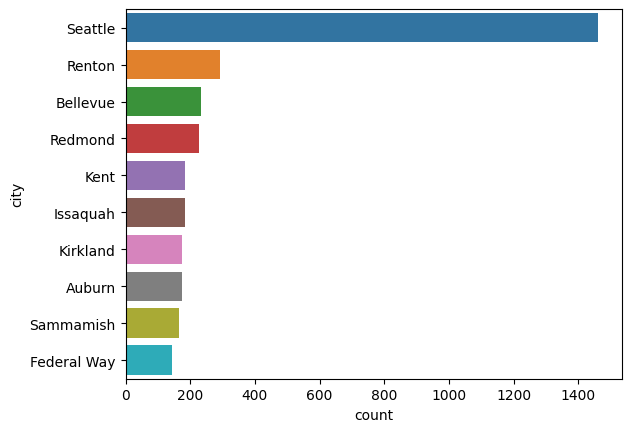

In [388]:
#BarPlot view of top 10 cities
Top_cities = dataSet['city'].value_counts().head(10)
sns.barplot(x = Top_cities, y=Top_cities.index)

**Give value 1 or 0 for renovated or not as int data**

In [389]:
#Give value 1 or 0 for renovated or not as int data
dataSet['yr_renovated'] = dataSet['yr_renovated'].apply(lambda x: x if x == 0 else 1)

**Lets see how many houses renovated or not in data set**

In [390]:
#Lets see how many houses renovated or not in data set
dataSet['yr_renovated'].value_counts()

yr_renovated
0    2559
1    1752
Name: count, dtype: int64

**Handling the categorical data**

In [391]:
#Handling the categorical data
dataSet = pd.get_dummies(dataSet, drop_first=True)
dataSet.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,False,False,True,False,False,False,False,False,False,False
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,False,False,False,False,False,False,False,False,False,False
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,False,False,False,False,False,False,False,False,False,False
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,False,False,False,False,False,False,False,False,False,False
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,...,False,True,False,False,False,False,False,False,False,False


*Dataset is ready for train and test for ML model*

**Split the data for X and Y axis**

In [392]:
#Split the data for X and Y axis
X = dataSet.drop('price',axis=1)
y = dataSet['price']

**Split dataset for train and testing purpose**

In [393]:
#Split dataset for train and testing purpose
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1500)

**Using Standard scalar which removes the removes the mean and scales each feature/variable to unit variance**

In [394]:
#Using Standard scalar which removes the removes the mean and scales each feature/variable to unit variance
sc = StandardScaler()

**Transform data for Train and Test after using Standard scalar**

In [395]:
#Transform data for Train and Test after using Standard scalar
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Calling for Linear Regression Model**

In [396]:
#Calling for Linear Regression Model
lr = LinearRegression()

**Insert Data to Linear Regression model**

In [397]:
#Insert Data to Linear Regression model
lr.fit(X_train, y_train)

LinearRegression()

Predition of Data

In [398]:
X_train_predict = lr.predict(X_train)
X_test_predict = lr.predict(X_test)
train = r2_score(y_train,X_train_predict)*100
test = r2_score(y_test,X_test_predict)*100

**Lets see the accuracy of train and test data inserted to LR model**

In [399]:
#Lets see the accuracy of train and test data inserted to LR model
print(f"Accuracy of training set:",train)
print(f"Accuracy of testing set: ",test)

Accuracy of training set: 70.15909649190182
Accuracy of testing set:  68.28173075377755
